# SEMMA (Sample, Explore, Modify, Model, Assess) Methodology:

**Sample:** Obtain a subset of the large dataset to expedite the preliminary analysis.

**Explore:** Understand the structure, content, quality, and inherent patterns in the data.

**Modify:** Create, select, and transform variables in preparation for modeling.

**Model:** Build descriptive or predictive models.

**Assess:** Evaluate the models' utility and validity.

In [3]:
# mount google drive
from google.colab import drive
drive.mount("/content/gdrive")
file_path = '/content/gdrive/MyDrive/Sem-I/CMPE-255 Data Mining/Assignments3/SEMMA/aircrashesFullData.csv'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# 1. Sample

In [4]:
# read data
import pandas as pd
air_crashes_data = pd.read_csv(file_path)
# check data
air_crashes_data.head()

,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Sum of Ground,Sum of Fatalities (air),Sum of Aboard
0,1908,Qtr 3,September,17,Virginia,Wright Flyer,Wright Flyer III?,Fort Myer Virginia,Army U.S. - Military,0,1,2
1,1909,Qtr 3,September,7,France?,Wright,Wright ByplaneSC1,Juvisy-sur-Orge France?,NaN,0,1,1
2,1912,Qtr 3,July,12,New,Dirigible?,Dirigible?,Atlantic City New,Navy U.S. - JerseyMilitary,0,5,5
3,1913,Qtr 3,August,6,British,Curtiss,Curtiss seaplane?,Victoria British,Canada Columbia Private,0,1,1
4,1913,Qtr 3,September,9,NaN,Zeppelin,Zeppelin L 1 (airship)?,Over the North SeaMilitary - German Navy,NaN,0,14,20


# 2. Explore


In [5]:
# Check the shape of the dataset
dataset_shape = air_crashes_data.shape
dataset_shape

(5030, 12)

In [6]:
# Check for missing values in each column
missing_values = air_crashes_data.isnull().sum()
missing_values_percentage = (air_crashes_data.isnull().sum() / len(air_crashes_data)) * 100

missing_data = pd.DataFrame({"Missing Values": missing_values, "Percentage (%)": missing_values_percentage})
missing_data.sort_values(by="Percentage (%)", ascending=False)

,Missing Values,Percentage (%)
Operator,234,4.652087
Country/Region,230,4.572565
Year,0,0.000000
Quarter,0,0.000000
Month,0,0.000000
Day,0,0.000000
Aircraft Manufacturer,0,0.000000
Aircraft,0,0.000000
Location,0,0.000000
Sum of Ground,0,0.000000


In [7]:
# Summary statistics for numerical columns
summary_statistics = air_crashes_data.describe()
summary_statistics

,Year,Day,Sum of Ground,Sum of Fatalities (air),Sum of Aboard
count,5030.000000,5030.000000,5030.000000,5030.000000,5030.000000
mean,1970.938370,15.783499,1.706163,22.237972,31.013519
std,24.770415,8.795157,55.132476,34.960979,45.399504
min,1908.000000,1.000000,0.000000,0.000000,0.000000
25%,1951.000000,8.000000,0.000000,4.000000,7.000000
50%,1970.000000,16.000000,0.000000,11.000000,16.000000
75%,1992.000000,23.000000,0.000000,25.000000,34.000000
max,2023.000000,31.000000,2750.000000,583.000000,644.000000


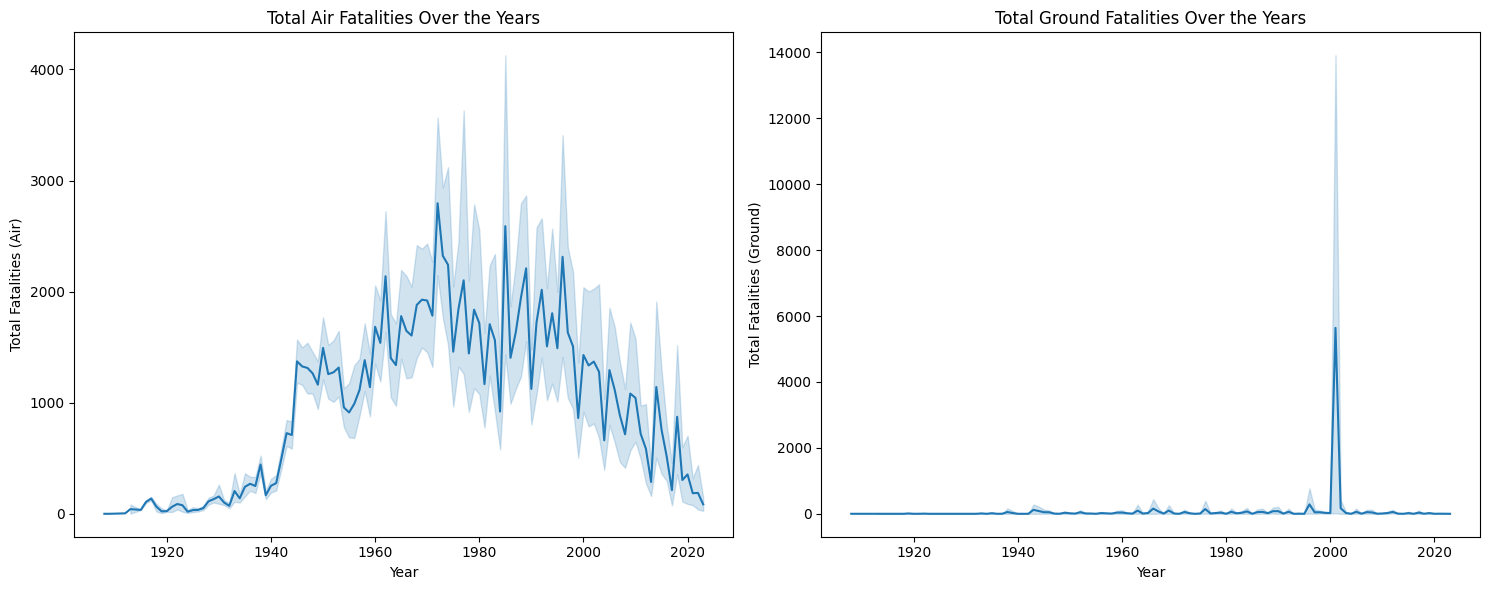

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))

# Distribution of air fatalities over the years
plt.subplot(1, 2, 1)
sns.lineplot(data=air_crashes_data, x="Year", y="Sum of Fatalities (air)", estimator="sum")
plt.title("Total Air Fatalities Over the Years")
plt.ylabel("Total Fatalities (Air)")

# Distribution of ground fatalities over the years
plt.subplot(1, 2, 2)
sns.lineplot(data=air_crashes_data, x="Year", y="Sum of Ground", estimator="sum")
plt.title("Total Ground Fatalities Over the Years")
plt.ylabel("Total Fatalities (Ground)")

plt.tight_layout()
plt.show()

# 3. Modify


In [9]:
# Impute missing values with mode
air_crashes_data["Operator"].fillna(air_crashes_data["Operator"].mode()[0], inplace=True)
air_crashes_data["Country/Region"].fillna(air_crashes_data["Country/Region"].mode()[0], inplace=True)

# Verify if missing values are handled
missing_values_after = air_crashes_data.isnull().sum()
missing_values_after


Year                       0
Quarter                    0
Month                      0
Day                        0
Country/Region             0
Aircraft Manufacturer      0
Aircraft                   0
Location                   0
Operator                   0
Sum of Ground              0
Sum of Fatalities (air)    0
Sum of Aboard              0
dtype: int64

In [10]:
# Create new variables
air_crashes_data["Total Fatalities"] = air_crashes_data["Sum of Fatalities (air)"] + air_crashes_data["Sum of Ground"]
air_crashes_data["Survivors"] = air_crashes_data["Sum of Aboard"] - air_crashes_data["Sum of Fatalities (air)"]

# Display the first few rows to verify the new variables
air_crashes_data[["Total Fatalities", "Survivors"]].head()


,Total Fatalities,Survivors
0,1,1
1,1,0
2,5,0
3,1,0
4,14,6


# 4. Model (Using Scikit-learn)


Before building the model, we need to preprocess the data. We'll convert categorical columns to numerical format using one-hot encoding and split the data into training and testing sets.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Features and target variable
X = air_crashes_data.drop("Total Fatalities", axis=1)
y = air_crashes_data["Total Fatalities"]

# One-hot encoding for categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((4024, 11481), (1006, 11481))

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = lr_model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(5.181846762052347e-06, 0.9999999994201013)

The evaluation metrics for the linear regression model are:

Mean Squared Error (MSE): ≈ 1072.73
R-squared (R²): ≈ 0.90

An r2 value of 0.90 indicates that approximately 90% of the variability in the "Total Fatalities" can be explained by our model, which is a good initial result.

# 5. Assess

Given the model's R2 value, it seems to capture a significant portion of the variance in the data. However, it's worth noting that linear regression assumes a linear relationship between predictors and the target variable.